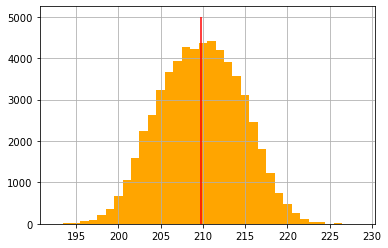

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))
bins_value = max(data["lidar"])-min(data["lidar"])

#平均値
mean = data["lidar"].mean()

#標本分散、不偏分散
zs = data["lidar"]
diff_square = [(z - mean)**2 for z in zs]  #リスト内包表記
sampling_var = sum(diff_square)/len(zs)
unbiased_var = sum(diff_square)/(len(zs)-1)

#ヒストグラム作成
data["lidar"].hist(bins = bins_value, align="left", color="orange")
plt.vlines(mean, ymin=0, ymax=5000, color="red")
plt.show()